### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [64]:
# data['car'].isnull().sum()
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [65]:
# Based on missing data it shows that Cars column mostly has missing data. The number of records in the coupons
# file is 12684 of which car columns has missing data for 12576 rows. So cars column is not of much consequence, while other columns like  Bar, Coffeehouse, Carryaway
# RestaurantLessThan20,Restaurant20To50 togther has total of 794 missing rows. This constitutes to 6% of total data
#Cleaned data for ages to remove strings to allow for comparison at age level
# which on ommission should not impact the whole data set. 
# Drop the missing data
columns_to_consider = [col for col in data.columns if col != 'car']
data_cleaned = data.dropna(subset=columns_to_consider)
print('After cleaning the number of entries are: ', data_cleaned.shape[0])

After cleaning the number of entries are:  12079


4. What proportion of the total observations chose to accept the coupon?

In [66]:
accepted_coupons = data_cleaned[data_cleaned['Y']==1].shape[0]
print('Number of accepted coupons ', accepted_coupons)
#proportion of coupons that were accepted
per_of_coupons_accepted = round(((accepted_coupons/data_cleaned.shape[0])*100),2)
print('Proportion of accepted coupons '+ str(per_of_coupons_accepted)+"%")

Number of accepted coupons  6877
Proportion of accepted coupons 56.93%


5. Use a bar plot to visualize the `coupon` column.

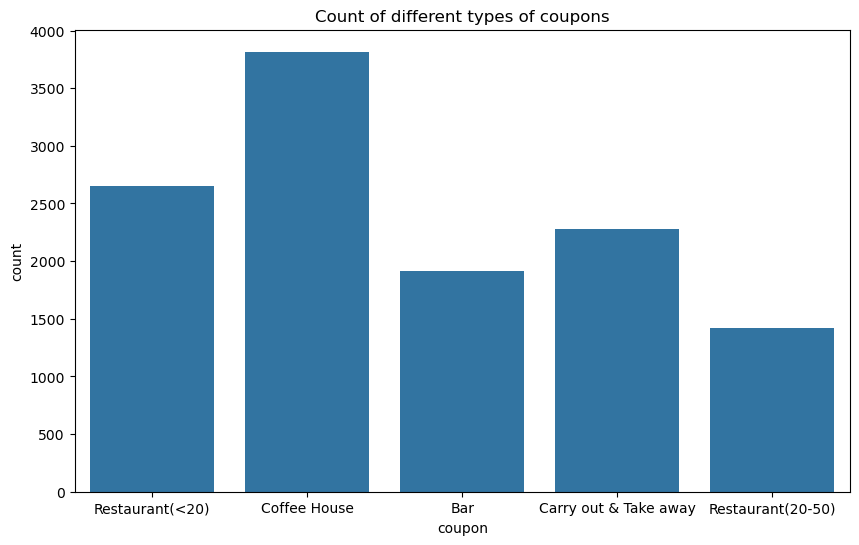

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(data_cleaned, x="coupon")
plt.title("Count of different types of coupons")
plt.savefig('images/couponcount.png')
plt.show()

6. Use a histogram to visualize the temperature column.

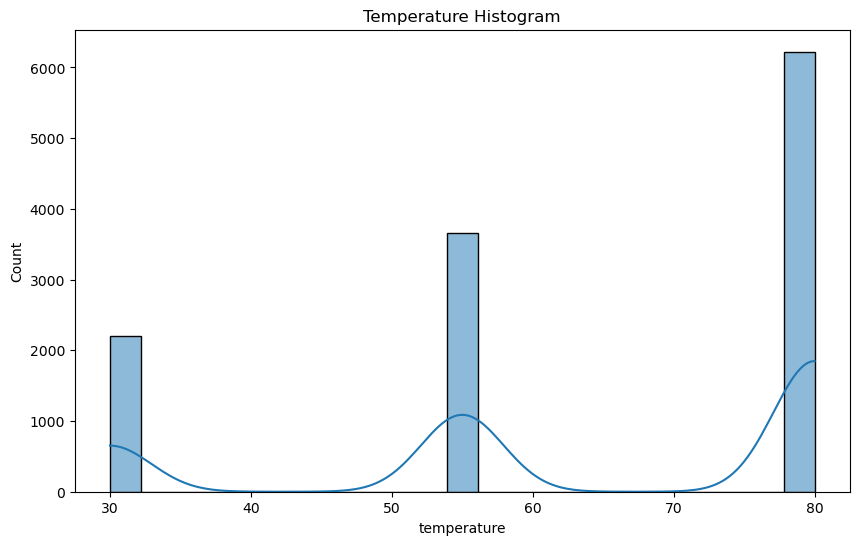

In [68]:
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned, x="temperature", kde = True)
plt.title("Temperature Histogram")
plt.savefig('images/temperature.png')
plt.show()

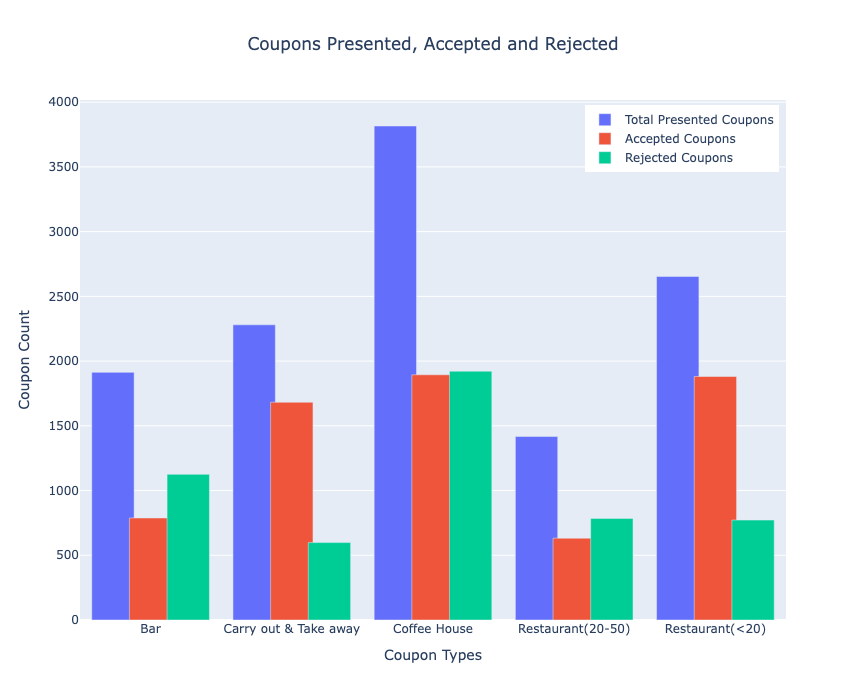

In [69]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = go.Figure()
fig = make_subplots(rows=1, cols=1)

# array of presented coupons
presented_coupon_counts = data_cleaned['coupon'].value_counts().sort_index()
presented_coupons = presented_coupon_counts.to_numpy()
#Array of coupons
coupons = np.sort(data_cleaned['coupon'].unique())
#array of accepted coupon count 
accepted_coupon_counts = data_cleaned[data_cleaned['Y']==1]['coupon'].value_counts().sort_index()
accepted_coupons = accepted_coupon_counts.to_numpy()
#array of rejected coupon count
rejected_coupon_counts = data_cleaned[data_cleaned['Y']==0]['coupon'].value_counts().sort_index()
rejetced_coupons =  rejected_coupon_counts.to_numpy()
fig.add_trace(go.Bar(x=coupons, y=presented_coupons, name='Total Presented Coupons', width=0.3), row=1, col=1)
fig.add_trace(go.Bar(x=coupons, y=accepted_coupons, name='Accepted Coupons', width=0.3), row=1, col=1)
fig.add_trace(go.Bar(x=coupons, y=rejetced_coupons, name='Rejected Coupons', width=0.3), row=1, col=1)
fig.update_layout(title_text="Coupons Presented, Accepted and Rejected", title_x=0.5)
fig.update_layout(height=700, width=800)
fig.update_layout(
    legend=dict(
        x=0.99,
        y=0.99,
        xanchor='right',
        yanchor='top'
    )
)

fig.update_layout(
    xaxis_title=dict(
        text="Coupon Types"        
    )
)

fig.update_layout(
    yaxis_title=dict(
            text="Coupon Count"        
        )
)

fig.show()
#Saved image  in images folder with name coupons_presented_accepted_Rejected.png


In [74]:
#Acceptance rates of each coupon
for i in range(len(coupons)):
    print('Accepted '+ str(accepted_coupons[i])+' '+coupons[i]+' coupons'+ ' from '+ str(presented_coupons[i]) +' with acceptance rate of '+str(round(((accepted_coupons[i]/presented_coupons[i])*100),2))+'%') 
    # print('Acceptance rate of '+coupons[i]+' coupons is '+ str(round(((accepted_coupons[i]/presented_coupons[i])*100),2))+'%')

Accepted 788 Bar coupons from 1913 with acceptance rate of 41.19%
Accepted 1682 Carry out & Take away coupons from 2280 with acceptance rate of 73.77%
Accepted 1894 Coffee House coupons from 3816 with acceptance rate of 49.63%
Accepted 632 Restaurant(20-50) coupons from 1417 with acceptance rate of 44.6%
Accepted 1881 Restaurant(<20) coupons from 2653 with acceptance rate of 70.9%


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
bar_coupon_df = data_cleaned[data_cleaned['coupon']=='Bar']
bar_coupon_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [13]:
total_bar_coupons = bar_coupon_df.shape[0]
print('Total Bar Coupons: ', total_bar_coupons)
bar_coupons_accepted = bar_coupon_df[bar_coupon_df['Y']==1].shape[0]
print('Bar coupons accepted: ',bar_coupons_accepted)
bar_coupons_accepted_proportion = round(((bar_coupons_accepted/total_bar_coupons)*100),2)
print("Proportion of bar coupons accepted is "+ str(bar_coupons_accepted_proportion)+"%")

Total Bar Coupons:  1913
Bar coupons accepted:  788
Proportion of bar coupons accepted is 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
bar_coupon_df['Bar'].unique()
three_or_less=['never', 'less1', '1~3']
more_than_3 = ['gt8', '4~8']
accepted = [1]
three_or_less_accepted = bar_coupon_df[bar_coupon_df['Bar'].isin(three_or_less) & bar_coupon_df['Y'].isin(accepted)].shape[0]
more_than_3_accpeted = bar_coupon_df[bar_coupon_df['Bar'].isin(more_than_3) & bar_coupon_df['Y'].isin(accepted)].shape[0]
print("Number of coupons accepted by those who went to a bar 3 or fewer times: ", three_or_less_accepted)
print("Number of coupons accepted by those who went to a bar more than 3: ", more_than_3_accpeted)
acceptance_perecent_three_or_less = round(((three_or_less_accepted/total_bar_coupons)*100),2)
acceptance_perecent_more_than_3 = round(((more_than_3_accpeted/total_bar_coupons)*100),2)
percent_accpeted_coupons_for_less_than_3_visits = acceptance_perecent_three_or_less - acceptance_perecent_more_than_3
print("Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more had a higher \nchance to accept the coupon by: ",percent_accpeted_coupons_for_less_than_3_visits)

Number of coupons accepted by those who went to a bar 3 or fewer times:  641
Number of coupons accepted by those who went to a bar more than 3:  147
Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more had a higher 
chance to accept the coupon by:  25.83


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
more_than_once_per_month=['1~3','gt8', '4~8']
df4 = bar_coupon_df[bar_coupon_df['Y']==1]

df4.loc[df4['age'] == '50plus', 'age'] = '51'
df4.loc[df4['age'] == 'below21', 'age'] ='20'

df4['age'] = df4['age'].astype(int)


more_than_once_over_25 = df4[(df4['age']>25) & (df4['Bar'].isin(more_than_once_per_month))].shape[0]
print('Drivers who go to a bar more than once a month and are over the age of 25: ', more_than_once_over_25)
more_than_once_over_25_acceptance_rate = round(((more_than_once_over_25/total_bar_coupons)*100),2)
print('Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25: '+ str(more_than_once_over_25_acceptance_rate)+'%')

allothers = df4[(df4['age']>25) & ~(df4['Bar'].isin(more_than_once_per_month))].shape[0] + df4[(df4['age']<25)].shape[0]
print('All others who accepted the coupons: ', allothers)
allothers_acceptance_rate = round(((allothers/total_bar_coupons)*100),2)
print('All others acceptance rate is: '+ str(allothers_acceptance_rate)+'%')


Drivers who go to a bar more than once a month and are over the age of 25:  278
Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25: 14.53%
All others who accepted the coupons:  510
All others acceptance rate is: 26.66%


/var/folders/j9/drwy8ljd6r77zvbqgglkyflr0000gn/T/ipykernel_61627/3660736621.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [16]:
df5 = bar_coupon_df[bar_coupon_df['Y']==1]
descoped_occupations = ['Farming Fishing & Forestry']
kids = ['Kid(s)']
df5['occupation'].value_counts()

drivers_nokid_nofarmfishfores = df5[~(df5['occupation'].isin(descoped_occupations)) & ~(df5['passanger'].isin(kids)) & (df5['Bar'].isin(more_than_once_per_month))].shape[0]
content1 = 'Drivers who go to bars more than once a month and had passengers that \nwere not a kid and had occupations other than farming, fishing, or forestry: '
print(content1, drivers_nokid_nofarmfishfores) 
drivers_nokid_nofarmfishfores_accep_rate = round(((drivers_nokid_nofarmfishfores/total_bar_coupons)*100),2)
print('Accptance rate of '+content1+ str(drivers_nokid_nofarmfishfores_accep_rate)+'%')

Drivers who go to bars more than once a month and had passengers that 
were not a kid and had occupations other than farming, fishing, or forestry:  376
Accptance rate of Drivers who go to bars more than once a month and had passengers that 
were not a kid and had occupations other than farming, fishing, or forestry: 19.65%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [17]:
incomes=['$12500 - $24999','$37500 - $49999','Less than $12500','$25000 - $37499']
marritalstaus=['Widowed']
cheaprestvisits = ['4~8', 'gt8']
nokid_notwidowed_onceormore = df4[(~(df4['maritalStatus'].isin(marritalstaus)) & ~(df4['passanger'].isin(kids)) & (df4['Bar'].isin(more_than_once_per_month)))].shape[0]
print('Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: ', nokid_notwidowed_onceormore)
drivers_nokid_notwidowed_onceormore_accep_rate = round(((nokid_notwidowed_onceormore/total_bar_coupons)*100),2)
print('Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, \nand were not widowed: '+str(drivers_nokid_notwidowed_onceormore_accep_rate)+'%')

onceormore_above30 = df4[ (df4['Bar'].isin(more_than_once_per_month)) & (df4['age']<30)].shape[0]
print('Drivers who go to bars more than once a month and are under the age of 30: ',onceormore_above30)
drivers_onceormore_above30_accep_rate = round(((onceormore_above30/total_bar_coupons)*100),2)
print('Acceptance rate of drivers who go to bars more than once a month and are under the age of 30: '+str(drivers_onceormore_above30_accep_rate)+'%')

cheap_restu_morethan4_lessthan50k = df4[(df4['income'].isin(incomes)) & (df4['RestaurantLessThan20'].isin(cheaprestvisits))].shape[0]
print('Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: ', cheap_restu_morethan4_lessthan50k)
cheap_restu_morethan4_lessthan50k_accep_rate = round(((cheap_restu_morethan4_lessthan50k/total_bar_coupons)*100),2)
print('Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: '+str(cheap_restu_morethan4_lessthan50k_accep_rate)+'%')

Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:  376
Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, 
and were not widowed: 19.65%
Drivers who go to bars more than once a month and are under the age of 30:  236
Acceptance rate of drivers who go to bars more than once a month and are under the age of 30: 12.34%
Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:  152
Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 7.95%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [18]:
drivers_withkids = df4[((df4['passanger'].isin(kids)) & (df4['Bar'].isin(more_than_once_per_month)))].shape[0]
print('Drivers who go to bars more than once a month with kids as passengers: ',drivers_withkids) 
drivers_age_21_and_30_no_kids = df4[(df4['age'].between(21,30) & ~(df4['passanger'].isin(kids)) & (df4['Bar'].isin(more_than_once_per_month)))].shape[0]
print('Drivers who go to bars more than once a month, between age 21 and 30, and had passengers \nthat were not a kid: ', drivers_age_21_and_30_no_kids)
drivers_with_income_lessthan50k = df4[df4['income'].isin(incomes)].shape[0]
print('Drivers who accept coupons whose income is less than 50k: ',drivers_with_income_lessthan50k)
drivers_with_income_lessthan40k = df4[df4['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499'])].shape[0]
print('Drivers who accept coupons whose income is less than 40k: ',drivers_with_income_lessthan40k)

Drivers who go to bars more than once a month with kids as passengers:  16
Drivers who go to bars more than once a month, between age 21 and 30, and had passengers 
that were not a kid:  225
Drivers who accept coupons whose income is less than 50k:  413
Drivers who accept coupons whose income is less than 40kk:  323


In [19]:
Based on the observations, drivers who are above the age of 25 years, mostly without kids as passengers, and 
who are widowed are likely to accept the coupons.

The acceptance of coupons for bar increases as the drivers income range increases

Drivers with kids as passengers are least likely to accept the coupons



SyntaxError: invalid syntax (3178803502.py, line 1)

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [26]:
# Evaluate data for Carry out & Take away coupon
take_out_coupons = data_cleaned[data_cleaned['coupon']=='Carry out & Take away']
total_take_out_coupons = take_out_coupons.shape[0]
print('Total take out coupons: ', take_out_coupons.shape[0]) 
take_out_coupons_accep = take_out_coupons[take_out_coupons['Y']==1]
print('Total take out coupons that were accepted: ', take_out_coupons_accep.shape[0])

Total take out coupons:  2280
Total take out coupons that were accepted:  1682


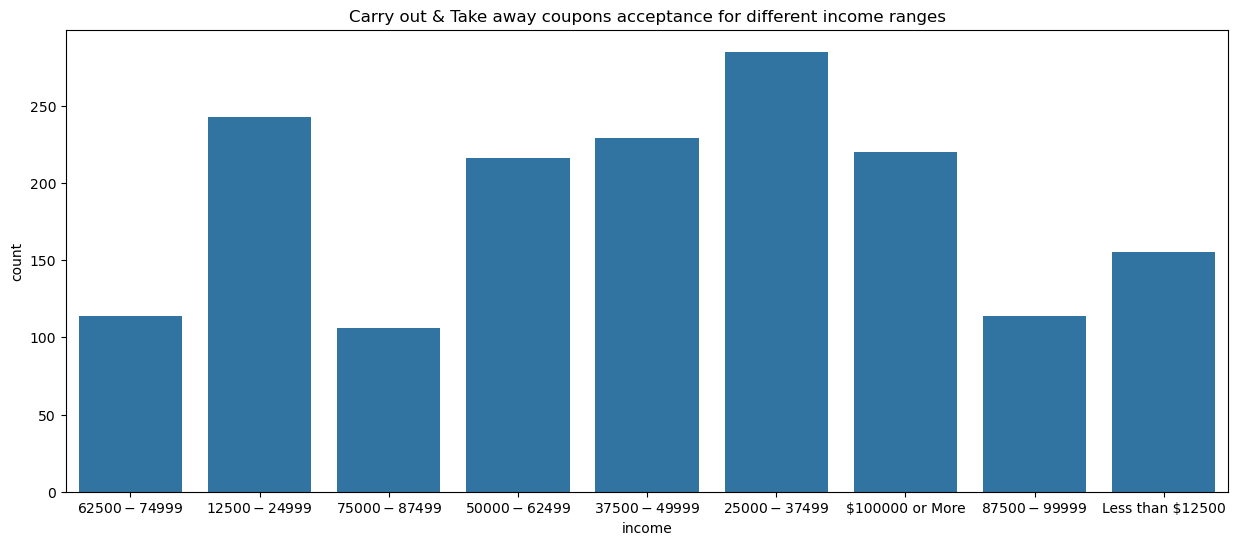

In [27]:
# Count plot for Carry out & Take away
plt.figure(figsize=(15,6))
sns.countplot(data = take_out_coupons_accep,  x='income')
plt.title('Carry out & Take away coupons acceptance for different income ranges')
plt.savefig('images/carryout_acceptance_incomeranges')
plt.show()

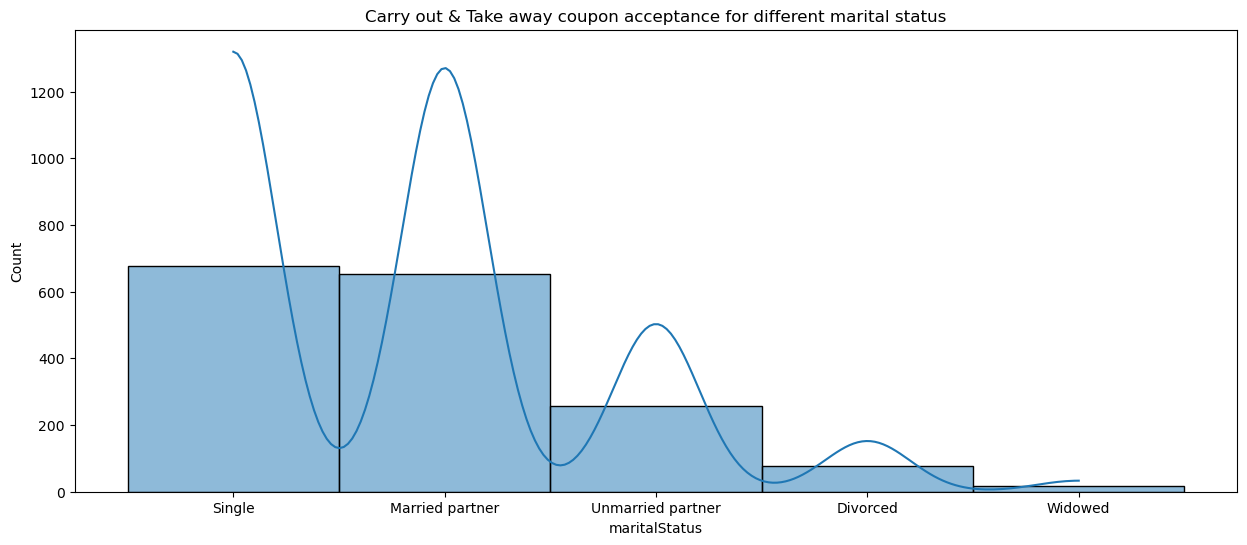

In [28]:
plt.figure(figsize=(15,6))
sns.histplot(data = take_out_coupons_accep, x='maritalStatus', kde=True)
plt.title('Carry out & Take away coupon acceptance for different marital status')
plt.savefig('images/carryout_acceptance_maritalstatus')
plt.show()

In [29]:
# Evaluting acceptance rate of Carry out & Take away coupons based on kids 
# as passengers

df7 =  take_out_coupons
df7['RestaurantLessThan20'].unique()
cheaprest_morethanonce = ['4~8', '1~3', 'gt8']

drivers_withkids = df7[df7['passanger'].isin(kids)].shape[0]
print('Driver who accepted coupons with kids in passengers: ', drivers_withkids)

drivers_morethanonce_withkids = df7[(df7['passanger'].isin(kids)) & (df7['RestaurantLessThan20'].isin(cheaprest_morethanonce))].shape[0]
print('Drivers who accepted coupons to cheaper restaurants when they had kids as passengers: ', drivers_morethanonce_withkids)

drivers_morethanonce_nokids =  df7[(df7['passanger'].isin(kids)) & ~(df7['RestaurantLessThan20'].isin(cheaprest_morethanonce))].shape[0]
print('Drivers who accepted coupons to non cheaper restaurants when they did not have kids as passengers: ', drivers_morethanonce_nokids)

Driver who accepted coupons with kids in passengers:  142
Drivers who accepted coupons to cheaper restaurants when they had kids as passengers:  115
Drivers who accepted coupons to non cheaper restaurants when they did not have kids as passengers:  27


In [30]:
df8 = data_cleaned[data_cleaned['coupon']=='Coffee House']
total_coffeehouse_coupons = df8.shape[0]
df9 = df8[df8['Y']==1]
total_coffeehouse_coupons_accept = df9.shape[0]
print('Total Coffee house coupons: ', total_coffeehouse_coupons)
print('Total Coffee house coupons that were accepted: ', total_coffeehouse_coupons_accept)
overall_accept_rate = round(((total_coffeehouse_coupons_accept/total_coffeehouse_coupons)*100),2)
print('Overall Coffee house coupons acceptance rate: '+ str(overall_accept_rate)+"%")

Total Coffee house coupons:  3816
Total Coffee house coupons that were accepted:  1894
Overall Coffee house coupons acceptance rate: 49.63%


In [31]:
# Evaluation of acceptance rate of coffee coupons at high temperature
coffee_accept_high_temp80 = df9[(df9['temperature'].isin([80]))].shape[0]
print('Drivers who accept coffee coupon at high temp: ', coffee_accept_high_temp80)
accept_rate_temp80 = round(((coffee_accept_high_temp80/total_coffeehouse_coupons)*100),2)
print('Coffee house coupons acceptance rate at high temp: '+ str(accept_rate_temp80)+"%")

Drivers who accept coffee coupon at high temp:  1211
Coffee house coupons acceptance rate at high temp: 31.73%


In [32]:
# Evaluation of acceptance rate of coffee coupons at low and moderate temperature
coffee_accept_low_moderate = df9[(df9['temperature'].isin([30,55]))].shape[0]
print('Drivers who accept coffee coupon at low and moderate temp: ', coffee_accept_low_moderate)
accept_rate_low_moderate_temp = round(((coffee_accept_low_moderate/total_coffeehouse_coupons)*100),2)
print('Coffee house coupons acceptance rate at low and moderate temp: '+ str(accept_rate_low_moderate_temp)+"%")

Drivers who accept coffee coupon at low and moderate temp:  683
Coffee house coupons acceptance rate at low and moderate temp: 17.9%


In [33]:
print('Difference in acceptance of coffee coupons at high vs low and moderate temperature is '+ str(round(accept_rate_temp80-accept_rate_low_moderate_temp))+'%')

Difference in acceptance of coffee coupons at high vs low and moderate temperature is 14%


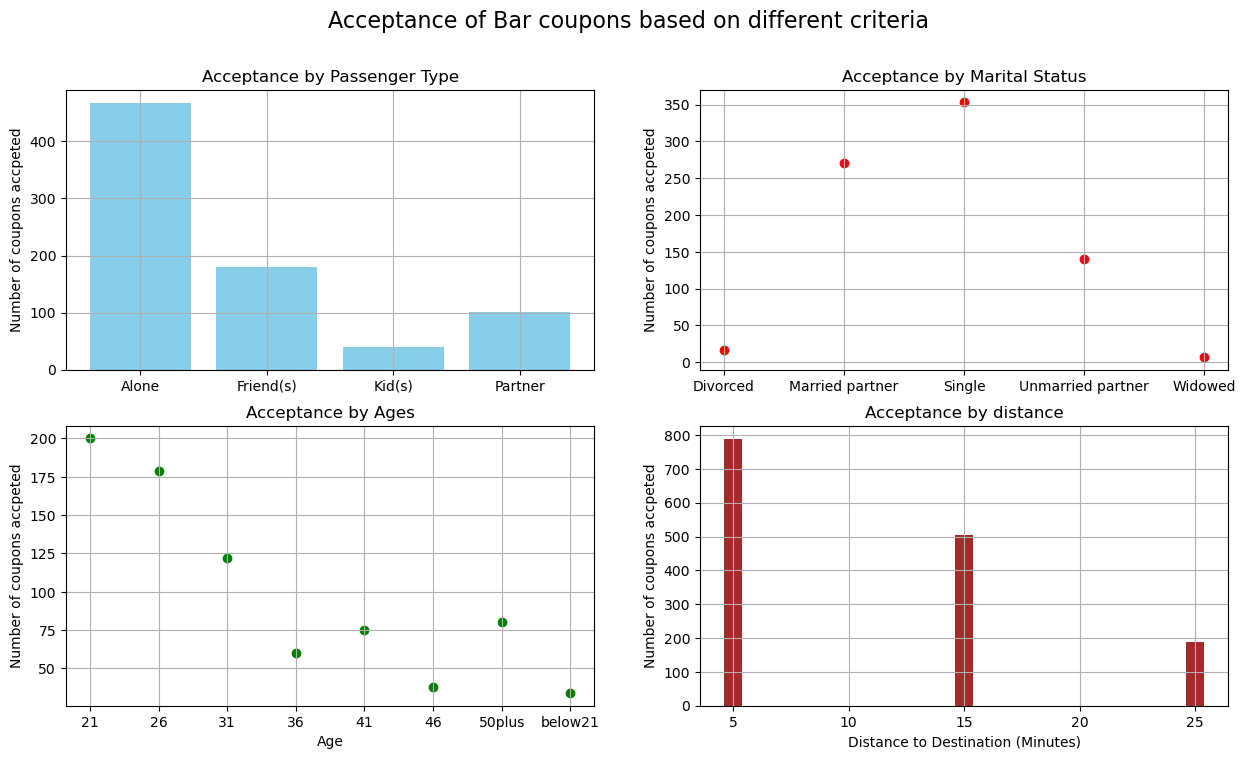

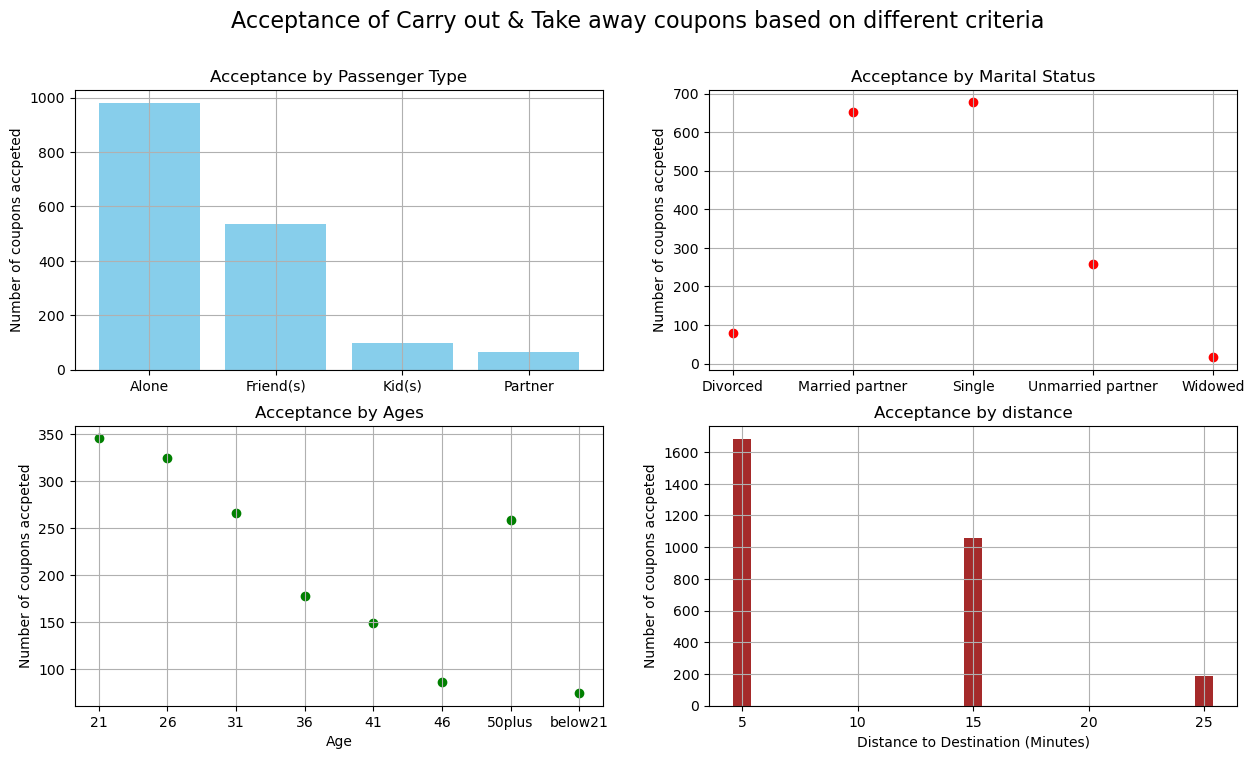

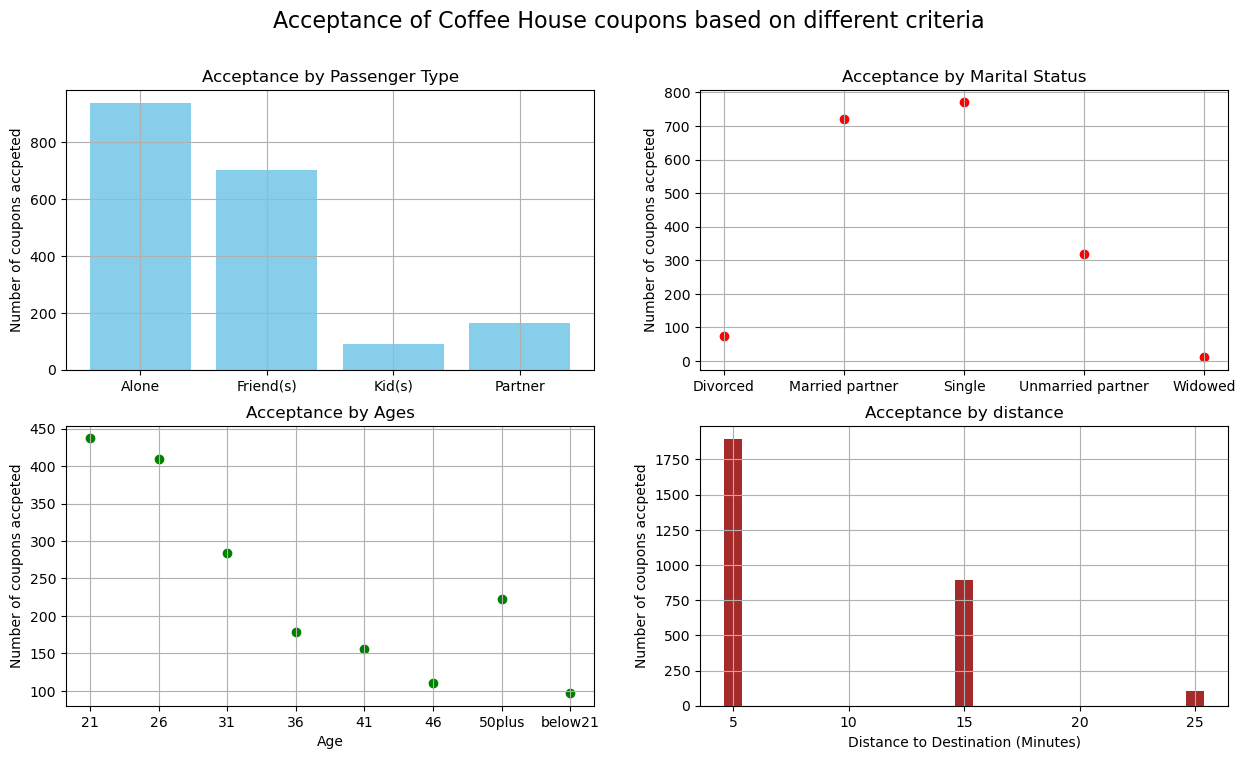

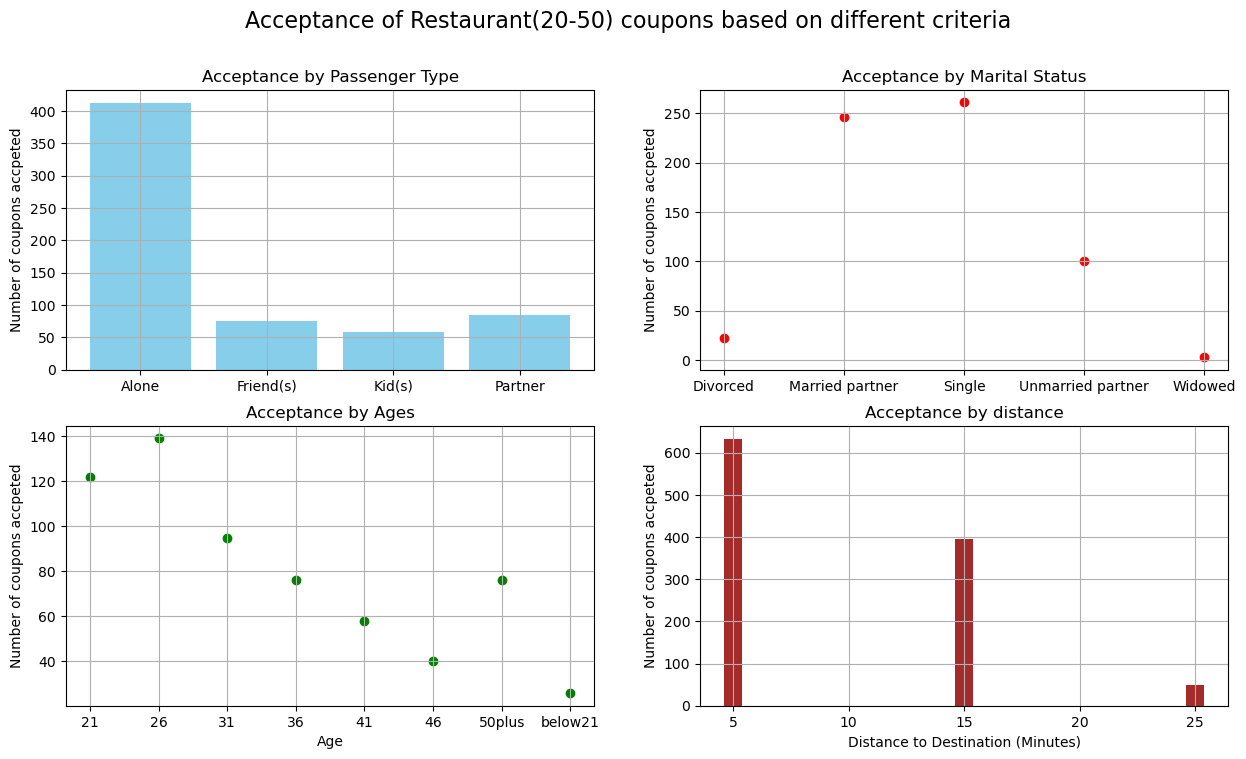

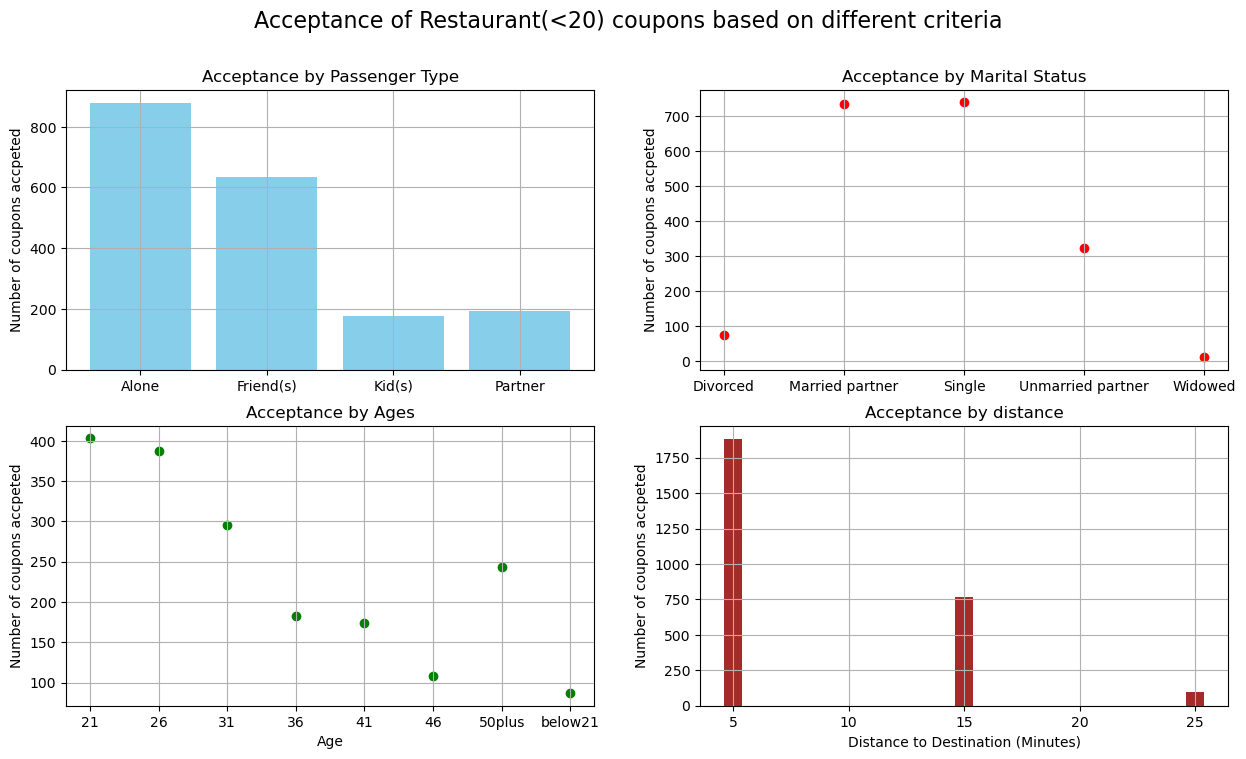

In [83]:
for i in range(len(coupons)):
    df9= data_cleaned[(data_cleaned['Y']==1) & (data_cleaned['coupon']==str(coupons[i]))]
    passengertypes = np.sort(df9['passanger'].unique())
    passengertype_counts = df9['passanger'].value_counts().sort_index().to_numpy()
    incomeranges = np.sort(df9['income'].unique())
    incomerange_counts =  df9['income'].value_counts().sort_index().to_numpy()
    maritalStatustypes = np.sort(df9['maritalStatus'].unique())
    maritalStatustypes_counts = df9['maritalStatus'].value_counts().sort_index().to_numpy()
    ages = np.sort(df9['age'].unique())
    age_counts = df9['age'].value_counts().sort_index().to_numpy()
    dist_one_min = df9['toCoupon_GEQ5min'].value_counts()[1]
    dist_15_min = df9['toCoupon_GEQ15min'].value_counts()[1]
    dist_25_min = df9['toCoupon_GEQ25min'].value_counts()[1]
    
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 8))
    axs[0,0].bar(passengertypes, passengertype_counts, color='skyblue')
    axs[0,0].set_title('Acceptance by Passenger Type')
    axs[0,0].set_ylabel('Number of coupons accpeted')
    axs[0,0].grid(True)
    
    axs[0,1].scatter(maritalStatustypes, maritalStatustypes_counts, color='red')
    axs[0,1].set_title('Acceptance by Marital Status')
    axs[0,1].set_ylabel('Number of coupons accpeted')
    axs[0,1].grid(True)
    
    axs[1,0].scatter(ages, age_counts, color='green')
    axs[1,0].set_title('Acceptance by Ages')
    axs[1,0].set_ylabel('Number of coupons accpeted')
    axs[1,0].set_xlabel('Age')
    axs[1,0].grid(True)
    
    axs[1,1].bar([5, 15, 25], [dist_one_min, dist_15_min, dist_25_min], color='brown')
    axs[1,1].set_title('Acceptance by distance')
    axs[1,1].set_ylabel('Number of coupons accpeted')
    axs[1,1].set_xlabel('Distance to Destination (Minutes)')
    axs[1,1].grid(True)
    plt.suptitle('Acceptance of '+ str(coupons[i])+' coupons based on different criteria', fontsize=16)
    
    fig.savefig('images/'+str(coupons[i])+'_coupons_subplot')
    